# Assignment 3: Linear Regression

# Multiple Variables

Module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.linear_model import LinearRegression
import mpl_toolkits.mplot3d as axes3d

Function to read the file and return X, y, no. of training data and no. of features

In [2]:
def read_file(file_name, delimiter):
    points = np.loadtxt(file_name, delimiter=delimiter)
    m = points.shape[0]
    n = points.shape[1] - 1 # no. of features
    X = points[..., 0:n]
    y = points[..., n:]
    return X, y, m, n

Functions needed to implement gradient descent

In [3]:
def cost(X, y, theta):
    # cost = (1/2m) ((Xtheta- y)T * (Xtheta - y))
    m = X.shape[0]
    ans = np.matmul(X, theta)
    ans = ans - y
    ans = np.matmul(ans.T, ans)
    return (1 / (2 * m)) * ans

def gradient(X, y, theta):
    # gradient = (1/m) * ((XT) * (Xtheta - y))
    ans = np.matmul(X, theta) - y
    ans = np.matmul(X.T, ans)
    m = X.shape[0]
    return (1 / m) * ans

def gradient_descent(X, y, theta, iters=1500, alpha=0.01):
    for i in range(iters):
        theta = theta - alpha * gradient(X, y, theta)
    return theta

## Normalization

In [4]:
def normalize(X):
    newX = []
    for col in X.T:
        mean = stats.mean(col.ravel())
        stdev = stats.stdev(col.ravel())
        col = (col - mean) / stdev
        newX.append(col.ravel())
    return np.array(newX).reshape(X.shape)

## Method 1: Gradient descent

In [5]:
# in order to run gradient descent, we need to add a x0 feature to features matrix 
# it is a column with all values equal to 1

X, y, m, n = read_file('ex1data2.txt', ',')
nor_X = normalize(X)

x0s = np.ones((m, 1))
gd_X = np.append(x0s, nor_X, axis=1)

# now we have n+1 features:
theta = np.zeros((n+1, 1))

theta = gradient_descent(gd_X, y, theta)

### Gradient Descent - Plot

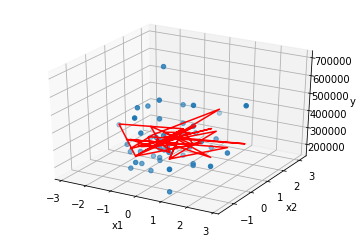

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.scatter(nor_X[..., 0].ravel(), nor_X[..., 1].ravel(), y[..., 0].ravel())
xs = list(nor_X[..., 0].ravel())
ys = list(nor_X[..., 1].ravel())
t0, t1, t2 = theta[0][0], theta[1][0], theta[2][0]
zs = []
for i in range(0, len(xs)):
    zs.append(t0 + t1*xs[i] + t2*ys[i])
ax1.plot(xs, ys, zs, c='r')
plt.show()

## Method 2: Scikit learn

In [7]:
regressor = LinearRegression()
regressor.fit(nor_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)